# Predicting Ratio of Total Liquidation To Total Borrow in Gora Lending Data

### Rationale:

Credit risk is one of the things to significantly manage in the fast-evolving DeFi (decentralized finance) landscape. Sophisticated artificial intelligence (machine learning) techniques are herein used to further enhance the precision of our predictions and to make a more informed development of lending risk in Gora. More specifically, we aim to predict the Total Liquidation to Total Borrow Ratio, a very important metric to signal the likelihood of defaults on debts from the wallet. These insights can assist in not only protecting the lending platforms but also protecting a healthier DeFi ecosystem by predicting defaults before they occur.

### Objectives:

1. **Predictive Accuracy**
   High predictive accuracy ensures lending platforms can manage and mitigate the risk associated with lending in the best possible manner.
2. **Insightful Risk Assessment**
   Provide comprehensive risk assessment tools that lending platforms may adopt for their purposes in monitoring and adjusting the lending strategies based on predicted credit risks.
3. **Enhance Understanding**
   This analysis aims to contribute to the general understanding of borrower behaviors in DeFi and further enhancement of risk management strategies.


### Procedures:

1. **Data Preprocessing**
   Cleaning and standardizing the data to ensure our models operate on high-quality and relevant information.

2. **Feature Engineering**
   Crafting features that capture the essence of borrowing behaviors and their implications on risk.

3. **Building a Model and Selection**
   Experimenting with various statistical and machine learning models to find the most effective predictors of liquidation.

4. **Model Evaluation and Refinement**
   Using Root Mean Squared Error (RMSE) and other relevant metrics to evaluate and refine our models for the best performance.

## Importing Libraries and Datasets

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
from giza_datasets import DatasetsLoader
from giza_actions.action import Action, action
from giza_actions.task import task

loader = DatasetsLoader()
df = loader.load("gora-competition-training")

09:32:24.864 | WARNING | Compute Engine Metadata server unavailable on attempt 1 of 3. Reason: [WinError 10051] A socket operation was attempted to an unreachable network

09:32:24.895 | WARNING | Compute Engine Metadata server unavailable on attempt 2 of 3. Reason: [WinError 10051] A socket operation was attempted to an unreachable network

09:32:24.899 | WARNING | Compute Engine Metadata server unavailable on attempt 3 of 3. Reason: [WinError 10051] A socket operation was attempted to an unreachable network

09:32:24.902 | WARNING | Authentication failed using Compute Engine authentication due to unavailable metadata server.

09:32:25.437 | WARNING | Compute Engine Metadata server unavailable on attempt 1 of 5. Reason: HTTPConnectionPool(host='metadata.google.internal', port=80): Max retries exceeded with url: /computeMetadata/v1/instance/service-accounts/default/?recursive=true (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000017200451510>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

09:32:25.445 | WARNING | Compute Engine Metadata server unavailable on attempt 2 of 5. Reason: HTTPConnectionPool(host='metadata.google.internal', port=80): Max retries exceeded with url: /computeMetadata/v1/instance/service-accounts/default/?recursive=true (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000017200453710>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

09:32:25.452 | WARNING | Compute Engine Metadata server unavailable on attempt 3 of 5. Reason: HTTPConnectionPool(host='metadata.google.internal', port=80): Max retries exceeded with url: /computeMetadata/v1/instance/service-accounts/default/?recursive=true (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000017200469610>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

09:32:25.462 | WARNING | Compute Engine Metadata server unavailable on attempt 4 of 5. Reason: HTTPConnectionPool(host='metadata.google.internal', port=80): Max retries exceeded with url: /computeMetadata/v1/instance/service-accounts/default/?recursive=true (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001720046A910>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

09:32:25.472 | WARNING | Compute Engine Metadata server unavailable on attempt 5 of 5. Reason: HTTPConnectionPool(host='metadata.google.internal', port=80): Max retries exceeded with url: /computeMetadata/v1/instance/service-accounts/default/?recursive=true (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000017200451AD0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

Dataset read from cache.
Loading dataset gora-competition-training from cache.


In [2]:
#Print first few values of the dataframe
display(df.head())

address,total_borrow,count_borrow,avg_borrow_amount,std_borrow_amount,first_borrow_date,token_borrow_mode,borrow_amount_cv,total_repay,count_repay,avg_repay_amount,std_repay_amount,repay_amount_cv,total_deposit,count_deposit,avg_deposit_amount,std_deposit_amount,deposit_amount_cv,total_redeem,count_redeem,avg_redeem_amount,std_redeem_amount,redeem_amount_cv,total_liquidation,count_liquidation,avg_liquidation_amount,std_liquidation_amount,liquidation_amount_cv,days_since_first_borrow,net_outstanding,int_paid,net_deposits,count_repays_to_count_borrows,avg_repay_to_avg_borrow,net_outstanding_to_total_borrowed,net_outstanding_to_total_repaid,count_redeems_to_count_deposits,total_redeemed_to_total_deposits,avg_redeem_to_avg_deposit,net_deposits_to_total_deposits,net_deposits_to_total_redeemed,avg_liquidation_to_avg_borrow,dex_total_sum_added,dex_total_sum_removed,dex_total_sum_swapped,liquidated,calc_start_time,added_at,total_liquidation_to_total_borrow,__index_level_0__
str,f64,i64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,i64
"""0x3266424c9bee…",19.039084,18,1.057727,2.268998,"""2022-05-07""","""USDC""",2.145165,0.100039,1.0,0.100039,0.0,0.0,171.150064,31.0,5.52097,22.30352,4.039783,120.110572,1.0,120.110572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.0,18.939045,0.0,51.039492,0.055556,0.094579,0.994746,189.317266,0.032258,0.701785,21.755339,0.298215,0.424938,0.0,0.0,0.0,0.0,0.0,"""2023-02-04 16:…","""2023-02-04 16:…",0.0,269840
"""0xae26d5f10a17…",0.140274,1,0.140274,0.0,"""2022-08-02""","""usdc""",0.0,0.0,0.0,0.0,0.0,0.0,0.182521,2.0,0.091261,0.124356,1.362643,0.0,0.0,0.0,0.0,0.0,0.136103,1.0,0.136103,0.0,0.0,211.0,0.140274,0.0,0.182521,0.0,0.0,1.0,0.140274,0.0,0.0,0.0,1.0,0.182521,0.970264,0.0,0.0,0.0,1.0,"""2023-03-01 16:…","""2023-03-01 16:…",0.970264,723218
"""0x38a0c07f7288…",9.020736,1,9.020736,0.0,"""2022-11-21""","""usdc""",0.0,0.0,0.0,0.0,0.0,0.0,11.423414,1.0,11.423414,0.0,0.0,4.050475,1.0,4.050475,0.0,0.0,9.077842,1.0,9.077842,0.0,0.0,74.0,9.020736,0.0,7.372939,0.0,0.0,1.0,9.020736,1.0,0.354577,0.354577,0.645423,1.820265,1.00633,0.0,0.0,0.0,1.0,"""2023-02-03 16:…","""2023-02-03 16:…",1.00633,261348
"""0xe90fafe58deb…",20.05015,1,20.05015,0.0,"""2022-08-27""","""USDC""",0.0,20.007832,1.0,20.007832,0.0,0.0,78.856029,4.0,19.714007,35.708654,1.811334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162.0,0.042318,0.0,78.856029,1.0,0.997889,0.002111,0.002115,0.0,0.0,0.0,1.0,78.856029,0.0,0.0,0.0,0.0,0.0,"""2023-02-05 16:…","""2023-02-05 16:…",0.0,294147
"""0x212944bff114…",0.0001,1,0.0001,0.0,"""2022-09-06""","""USDC""",0.0,0.0,0.0,0.0,0.0,0.0,13.05175,10.0,1.305175,1.977116,1.514828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.0,0.0001,0.0,13.05175,0.0,0.0,0.00999,0.0001,0.0,0.0,0.0,1.0,13.05175,0.0,0.0,0.0,0.0,0.0,"""2023-01-18 21:…","""2023-01-19 07:…",0.0,16998


In [3]:
lending_df = df.to_pandas()


#Print the summary statistics of lending_df
summary_statistics = lending_df.describe()

display(summary_statistics)

,total_borrow,count_borrow,avg_borrow_amount,std_borrow_amount,borrow_amount_cv,total_repay,count_repay,avg_repay_amount,std_repay_amount,repay_amount_cv,...,avg_redeem_to_avg_deposit,net_deposits_to_total_deposits,net_deposits_to_total_redeemed,avg_liquidation_to_avg_borrow,dex_total_sum_added,dex_total_sum_removed,dex_total_sum_swapped,liquidated,total_liquidation_to_total_borrow,__index_level_0__
count,7.833220e+05,783322.000000,7.833220e+05,783322.000000,783322.000000,7.833220e+05,783322.000000,7.833220e+05,783322.000000,783322.000000,...,7.833220e+05,783322.000000,7.833220e+05,783322.000000,783322.0,783322.0,783322.0,783322.000000,783322.000000,7.833220e+05
mean,6.033347e+03,11.778749,2.344247e+02,242.959980,1.442197,5.550964e+03,4.115828,2.609501e+02,238.722945,0.623140,...,9.019779e+02,-113.007873,2.737097e+02,0.557274,0.0,0.0,0.0,0.215671,0.132184,5.091820e+05
std,1.680525e+05,15.245985,9.115010e+03,6109.928866,1.412328,1.614440e+05,11.088226,9.158955e+03,4696.365759,0.890489,...,4.597125e+04,6271.526552,1.602028e+04,2.453003,0.0,0.0,0.0,0.411287,0.320387,2.944697e+05
min,1.000000e-12,1.000000,1.000000e-12,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,-706950.252662,-9.999986e-01,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00
25%,6.618732e-02,1.000000,2.083023e-02,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.464784,1.145047e-01,0.000000,0.0,0.0,0.0,0.000000,0.000000,2.539652e+05
50%,1.488423e+00,6.000000,2.211536e-01,0.069441,1.225045,9.999503e-02,1.000000,4.414827e-02,0.000000,0.000000,...,6.867271e-02,0.988364,1.074616e+00,0.000000,0.0,0.0,0.0,0.000000,0.000000,5.082325e+05
75%,1.593537e+01,20.000000,2.500000e+00,2.038590,2.233169,1.000349e+01,4.000000,1.866427e+00,0.739240,1.246357,...,1.968527e+00,1.000000,6.326215e+00,0.000000,0.0,0.0,0.0,0.000000,0.000000,7.635108e+05
max,1.795176e+07,732.000000,1.567741e+06,696907.961050,6.751410,1.794177e+07,580.000000,1.567741e+06,404424.843263,6.629086,...,4.137916e+06,1.000000,5.213832e+06,46.797406,0.0,0.0,0.0,1.000000,5.469605,1.019888e+06


## Data Cleaning

In [4]:
# Function to generate and display a NaN report
@task(name=f"Nan Report")
def generate_nan_report(df, display_report=True, return_report=False):
    nan_counts = df.isna().sum()
    nan_percentage = (nan_counts / len(df)) * 100
    nan_report = pd.DataFrame({'Missing Values': nan_counts, 'Percentage (%)': nan_percentage})
    
    if display_report:
        pd.set_option('display.max_rows', None)
        print(nan_report)
        pd.reset_option('display.max_rows')
    
    if return_report:
        return nan_report

# Display the NaN report
nan_report = generate_nan_report.fn(lending_df, return_report=True)

# Report on value_counts for each of the columns that are of type string
value_counts_report = {}
for column in lending_df.select_dtypes(include=['object']).columns:
    value_counts_report[column] = lending_df[column].value_counts()

# Displaying the data type of each column
print(lending_df.dtypes)

# Displaying all of the value_counts_report
for key, value in value_counts_report.items():
    print(f"Value counts for {key}:\n{value}\n")

# Let's drop a non-informative variable/feature
if 'column_to_drop' in lending_df.columns:
    lending_df.drop('column_to_drop', axis=1, inplace=True)

                                   Missing Values  Percentage (%)
address                                         0             0.0
total_borrow                                    0             0.0
count_borrow                                    0             0.0
avg_borrow_amount                               0             0.0
std_borrow_amount                               0             0.0
first_borrow_date                               0             0.0
token_borrow_mode                               0             0.0
borrow_amount_cv                                0             0.0
total_repay                                     0             0.0
count_repay                                     0             0.0
avg_repay_amount                                0             0.0
std_repay_amount                                0             0.0
repay_amount_cv                                 0             0.0
total_deposit                                   0             0.0
count_depo

It seems the data is already clean and no NAN values are present. Now lets explore if the data contain any duplicate entries.

In [5]:
# Check how many duplicates are there in the dataset
duplicates_count = lending_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Drop duplicates and retain the first occurrence
lending_df_no_dup = lending_df.drop_duplicates()
print("Duplicates dropped. First occurrence retained.")

Number of duplicate rows: 0
Duplicates dropped. First occurrence retained.


## Baseline Model Creation

### Objective
The objective of this section is to establish a `baseline model` for predicting the Total Liquidation to Total Borrow Ratio in the Gora Lending Data. This `baseline model` will exclude categorical and date/time features to focus on the raw numerical predictability of the dataset.

### Rationale
The baseline model is a kind of foundation model that is used in the building process for any kind of predictive model. It really gives a very simple and effective way to understand the underlying predictability of the dataset with minimal preprocessing and feature engineering. This approach offers several benefits:

- **Simplicity**: By excluding complex features such as categorical and date/time data, we simplify the model development process, making it easier to identify the natural patterns and relationships in the numerical data.

- **Benchmarking**: marking**: The baseline model serves as a benchmark for comparing more complex models. Any subsequent increase in performance can be attributed to specific enhancements, such as advanced feature engineering, inclusion of categorical data, or more sophisticated modeling 

- **Speed**: Baseline model development is faster in general, requires fewer computational resources, and allows for quick iterations to make assessments.

- **Focus on Numerical Data**: In most cases, direct signals are found for most predictive tasks in numerical data. Zeroing down on these features shall enable us to gain access to their predictiveness without potential noise quickly coming from more complex feature types.

### Methodology
The following steps will be taken to develop the baseline model:

1. **Data Loading**: Load the dataset and filter out non-numerical columns.
2. **Data Cleaning**: Handle missing values and anomalies in the numerical data.
3. **Model Selection**: Choose a simple yet robust model/s for the initial prediction.
4. **Model Training**: Train the model on a portion of the dataset to evaluate its performance.
5. **Evaluation**: Assess the model using the required metrics of the competition (RMSE) to establish a performance baseline.

### Expected Outcomes
We anticipate that the baseline model will provide us with an initial understanding of the dataset's predictability. This model will also help identify if the numerical data alone can provide a strong predictive signal or if more sophisticated techniques are needed to capture the full complexity of the data.

In [6]:
##Create a dataframe copy of the orginal dataframe
lending_df_copy = lending_df.copy()

# List of columns to drop
# Initial columns to drop that are of object and date time data type
columns_to_drop = [ 
    'address', 
    'first_borrow_date', 
    'token_borrow_mode', 
    'calc_start_time', 
    'added_at', 
    '__index_level_0__'
]

# Additional liquidation-related columns to drop (supplementary features)
additional_columns_to_drop = [
    'total_liquidation', 
    'count_liquidation', 
    'avg_liquidation_amount', 
    'std_liquidation_amount',
    'liquidation_amount_cv', 
    'avg_liquidation_to_avg_borrow',
    'liquidated'
]

# Extend the original list with the new columns
columns_to_drop.extend(additional_columns_to_drop)

# Drop the columns from the DataFrame
lending_df_copy.drop(columns=columns_to_drop, axis=1, inplace=True)

# Now lending_df_copy has the columns removed.
display(lending_df_copy.head())

,total_borrow,count_borrow,avg_borrow_amount,std_borrow_amount,borrow_amount_cv,total_repay,count_repay,avg_repay_amount,std_repay_amount,repay_amount_cv,...,net_outstanding_to_total_repaid,count_redeems_to_count_deposits,total_redeemed_to_total_deposits,avg_redeem_to_avg_deposit,net_deposits_to_total_deposits,net_deposits_to_total_redeemed,dex_total_sum_added,dex_total_sum_removed,dex_total_sum_swapped,total_liquidation_to_total_borrow
0,19.039084,18,1.057727,2.268998,2.145165,0.100039,1.0,0.100039,0.0,0.0,...,189.317266,0.032258,0.701785,21.755339,0.298215,0.424938,0.0,0.0,0.0,0.000000
1,0.140274,1,0.140274,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.140274,0.000000,0.000000,0.000000,1.000000,0.182521,0.0,0.0,0.0,0.970264
2,9.020736,1,9.020736,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,9.020736,1.000000,0.354577,0.354577,0.645423,1.820265,0.0,0.0,0.0,1.006330
3,20.050150,1,20.050150,0.000000,0.000000,20.007832,1.0,20.007832,0.0,0.0,...,0.002115,0.000000,0.000000,0.000000,1.000000,78.856029,0.0,0.0,0.0,0.000000
4,0.000100,1,0.000100,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000100,0.000000,0.000000,0.000000,1.000000,13.051750,0.0,0.0,0.0,0.000000


In [7]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (Y)
X = lending_df_copy.drop('total_liquidation_to_total_borrow', axis=1)  # all columns except the target
Y = lending_df_copy['total_liquidation_to_total_borrow']  # only the target column

# Split the dataset into training and testing sets
# Default is 75% training and 25% testing. Adjust the test_size to change this ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (587491, 36)
X_test Shape:  (195831, 36)


In [8]:
# Since the dataset is to huge and we haven't create preliminary cleaning and analysis with our dataset
# We will only get 50k sample from the orginal training dataset where 25k of it are gathered by random sampling
# while the other 25k sample are gathered by clustered sampling
from sklearn.cluster import KMeans

# Combine X_train and Y_train for easier sampling
combined_train = pd.concat([X_train, Y_train], axis=1)

# Step 1: Random Sampling
random_sample = combined_train.sample(n=25000, random_state=42)

# Step 2: Remove the randomly sampled data from the original training set
remaining_data = combined_train.drop(random_sample.index)

# Perform clustering on the remaining data to pick the next 25,000 samples
kmeans = KMeans(n_clusters=100, random_state=42).fit(remaining_data.drop('total_liquidation_to_total_borrow', axis=1))

# Add cluster information to the DataFrame
remaining_data['cluster'] = kmeans.labels_

# Sample from each cluster
cluster_sample = remaining_data.groupby('cluster').apply(lambda x: x.sample(frac=1)).reset_index(drop=True)
cluster_based_sample = cluster_sample.sample(n=25000, random_state=42)

# Combine both samples to form the new training set
new_training_set = pd.concat([random_sample, cluster_based_sample], axis=0)

# Split the new_training_set back into X_train and Y_train
X_train_new = new_training_set.drop(columns=['cluster','total_liquidation_to_total_borrow'], axis=1)
Y_train_new = new_training_set['total_liquidation_to_total_borrow']

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
print("X_train_new Shape: ", X_train_new.shape)

# Check the total number of null values in the DataFrame
total_nulls = X_train_new.isnull().sum().sum()
print("Total number of null values in X_train_new:", total_nulls)

X_train_new Shape:  (50000, 36)
Total number of null values in X_train_new: 0


In [10]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Initialize the models with some default parameters. These parameters can be tuned further for better performance.
random_forest = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=5)
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)
ridge_regression = Ridge(alpha=1.0)
svm_regressor = SVR(kernel='rbf')
linear_regression = LinearRegression()

In [11]:
# Fit the models on the training data
random_forest.fit(X_train_new, Y_train_new)
gradient_boosting.fit(X_train_new, Y_train_new)
ridge_regression.fit(X_train_new, Y_train_new)
svm_regressor.fit(X_train_new, Y_train_new)
linear_regression.fit(X_train_new, Y_train_new)

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.84548e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


LinearRegression()

In [12]:
##Compute Metrics for Training and Testing Data
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Models list
models = [
    ("Random Forest", random_forest),
    ("Gradient Boosting", gradient_boosting),
    ("Ridge Regression", ridge_regression),
    ("SVM", svm_regressor),
    ("Linear Regression", linear_regression)
]

# Prepare dictionaries to hold the scores
mse_scores_train = {}
mse_scores_test = {}
rmse_scores_train = {}
rmse_scores_test = {}

# Calculate scores
for name, model in models:
    # Predictions
    train_preds = model.predict(X_train_new)
    test_preds = model.predict(X_test)
    
    # MSE
    mse_scores_train[name] = mean_squared_error(Y_train_new, train_preds)
    mse_scores_test[name] = mean_squared_error(Y_test, test_preds)
    
    # RMSE
    rmse_scores_train[name] = rmse(Y_train_new, train_preds)
    rmse_scores_test[name] = rmse(Y_test, test_preds)

# Convert dictionaries to DataFrames for easier plotting
mse_df = pd.DataFrame([mse_scores_train, mse_scores_test], index=["MSE Train", "MSE Test"])
rmse_df = pd.DataFrame([rmse_scores_train, rmse_scores_test], index=["RMSE Train", "RMSE Test"])

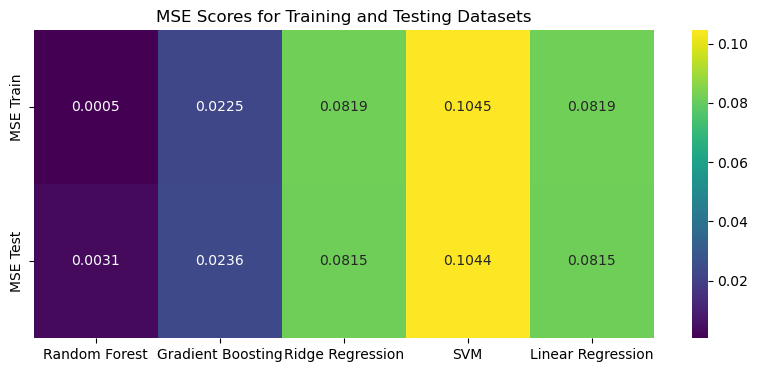

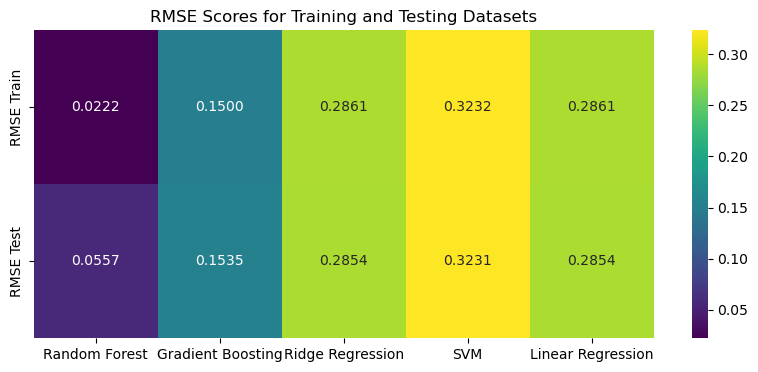

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot heatmap
def plot_heatmap(data, title):
    plt.figure(figsize=(10, 4))
    sns.heatmap(data, annot=True, fmt=".4f", cmap="viridis", cbar=True)
    plt.title(title)
    plt.show()

# Plotting the MSE and RMSE heatmaps
plot_heatmap(mse_df, "MSE Scores for Training and Testing Datasets")
plot_heatmap(rmse_df, "RMSE Scores for Training and Testing Datasets")

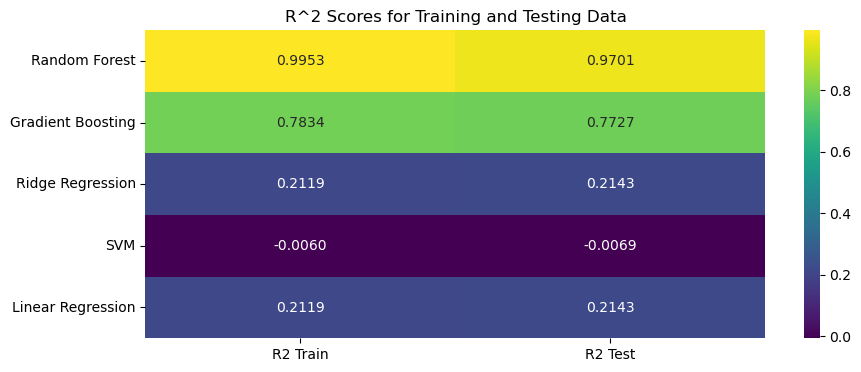

In [14]:
#Let's also calculate the R2_score of each model

from sklearn.metrics import r2_score

r2_scores_train = {}
r2_scores_test = {}

# Calculate R^2 for each model using the .score() method
for name, model in models:
    r2_scores_train[name] = model.score(X_train_new, Y_train_new)
    r2_scores_test[name] = model.score(X_test, Y_test)

# Convert the R^2 scores into a pandas DataFrame for visualization purposes
r2_df = pd.DataFrame({
    'R2 Train': r2_scores_train,
    'R2 Test': r2_scores_test
})

# Plot the R^2 Scores Heatmap
plot_heatmap(r2_df, "R^2 Scores for Training and Testing Data")

It seems that ensemble models work better across all of the regression models. This is a good start considering that Random Forest Regressor and Gradient Boosting model have worked good both in terms of RMSE, MSE and R2 score considering that we haven't done any feature engineering and other data preprocessing yet. On the next steps, we will figure out on how to further improve the capabilities of our model. We will be using our trained Random Forest Model as our base model.

## Data Exploration and Visualization

This section explores the distribution of each of the variables of the original dataset and the outliers. This will guide us on how to improve the quality of our data by exploring any irregularities of our dataset to further enhance our model's capability to learn well.

In [15]:
# Additional liquidation-related columns to drop (supplementary features)
supplementary_features_to_drop = [
    'total_liquidation', 
    'count_liquidation', 
    'avg_liquidation_amount', 
    'std_liquidation_amount',
    'liquidation_amount_cv', 
    'avg_liquidation_to_avg_borrow',
    'liquidated',
    '__index_level_0__'
]

#lets first drop the supplementary features from the dataset first

lending_df.drop(columns=supplementary_features_to_drop, axis=1, inplace=True)
lending_df.shape

(783322, 42)

C:\Users\Predator\AppData\Local\Temp\ipykernel_25400\3808055159.py:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(lending_df_numerical[column], ax=axes[i, 0], color='blue')
C:\Users\Predator\AppData\Local\Temp\ipykernel_25400\3808055159.py:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(lending_df_numerical[column], ax=axes[i, 0], color='blue')
C:\Users\Predator\AppData\Local\Temp\ipykernel_25400\3808055159.py:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(lending_df_numerical[column], ax=axes[i, 0], color='blue')


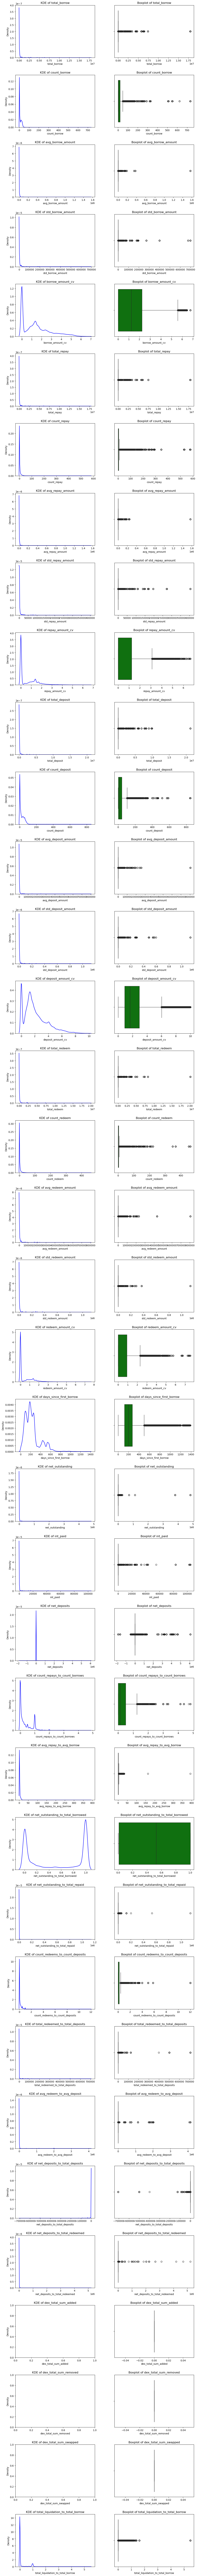

In [16]:
# Now let's visualize the numerical variables on our dataset.
variables_excluded = [ 
    'address', 
    'first_borrow_date', 
    'token_borrow_mode', 
    'calc_start_time', 
    'added_at', 
]

lending_df_numerical = lending_df.drop(columns=variables_excluded)

num_vars = len(lending_df_numerical.columns)
n_rows = num_vars  # One row per variable
n_cols = 2  # Two columns per variable: one for KDE plot and one for Box plot

# Create a larger figure size to accommodate the wider plots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 4 * n_rows))
fig.tight_layout(pad=5.0)  # Adjust spacing between plots

# Loop through the numerical variables
for i, column in enumerate(lending_df_numerical.columns):
    # KDE Plot on the left
    sns.kdeplot(lending_df_numerical[column], ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'KDE of {column}')
    
    # Box Plot on the right
    sns.boxplot(x=lending_df_numerical[column], ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f'Boxplot of {column}')

plt.show()

Considering that some of the variables have outliers, most of this could have signifant effect on training our models (except for ensemble/tree models which are more robust to outliers), we will remove the data entries that contain this outliers, as they may affect the performance of other models.

### Impact of Outlier Removal on Model Performance

#### **Improved Accuracy**
Outliers can cause models to learn misleading trends. Removing outliers helps ensure that the models capture the underlying patterns in the bulk of the data, rather than being skewed by extreme values. This is particularly crucial for linear models where high-leverage points can drastically change the fit of the model.

#### **Better Generalization**
Models trained with outliers often perform well on training data but poorly on unseen data because they overfit to these anomalies. Removing outliers can help models generalize better to ne.asets.

#### **Enhanced Model Stability**
Outliers can cause significant variability in the estimation of regression coefficients. Eliminating these outliers can stabilize the model, leading to more reliable predictions. This stability is crucial for models used in production environments where predictability and reliability are essential.

#### **Reduced Model Complexity**
In some cases, models may end up complex as they try to account for the anomalies represented by outliers. By removing these, the model complexity can often be reduced, making the model faster and more efficient during training and prediction phases.

#### **Use Cases**
1. **Linear Regression & Ridge Regression**: These models are sensitive to outliers. Their performance can be substantially improved by removing outliers, as these can disproportionately influence the regression line or hyperplane, leading to a lower R² score.
   
2. **SVM**: Negative R² scores indicate that the model is inappropriate or that the data contains anomalies that severely affect the model's ability to find an optimal hyperplane. Removing outliers can help in providing a more "manageable" dataset where the SVM can effectively find the decision boundary.
   
3. **Gradient Boosting & Random Forest**: While tree-based models are inherently more robust to outliers, extreme values can still affect the split decisions by altering the distribution and range of the data. Cleaning the data from extreme outliers can help in focusing the model on more "normal" conditions, possibly enhancing both the accuracy and the interpretab rare events analysis.
 tasks.


In [17]:
import pandas as pd

# Calculate IQR for each numerical variable
Q1 = lending_df_numerical.quantile(0.25)
Q3 = lending_df_numerical.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those values that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers = ((lending_df_numerical < (Q1 - 1.5 * IQR)) | (lending_df_numerical > (Q3 + 1.5 * IQR)))

# Count the number of outliers for each column
outliers_count = outliers.sum()
print("Number of outliers per feature:\n", outliers_count)

# Determine the threshold for dropping rows based on the percentage of outlier features
# Calculate the percentage of features that are outliers for each row
outliers_percentage = outliers.sum(axis=1) / len(lending_df_numerical.columns)

# Drop rows where 10% or more of the features are outliers
threshold_percentage = 0.10
# We now consider the excluded variables for our future training and data preprocessing
lending_df_clean = lending_df[outliers_percentage < threshold_percentage]

Number of outliers per feature:
 total_borrow                         145538
count_borrow                           5522
avg_borrow_amount                    138989
std_borrow_amount                    137522
borrow_amount_cv                       2971
total_repay                          138346
count_repay                           83394
avg_repay_amount                     156751
std_repay_amount                     166060
repay_amount_cv                       14372
total_deposit                        139266
count_deposit                          4636
avg_deposit_amount                   138286
std_deposit_amount                   148699
deposit_amount_cv                     26712
total_redeem                         156834
count_redeem                          93035
avg_redeem_amount                    144857
std_redeem_amount                    163137
redeem_amount_cv                      21550
days_since_first_borrow               59717
net_outstanding                      141630

In [18]:
print("Shape before outlier removal: ", lending_df_numerical.shape)
print("Shape after outlier removal: ", lending_df_clean.shape)

Shape before outlier removal:  (783322, 37)
Shape after outlier removal:  (506891, 42)


## Data Preprocessing

### Manual Preprocessing
Let's drop the unnecessary variables and create a manual transformation for the other variables (token borrow mode), where we will maintain the value of the top 8 tokens based on value counts, while renaming the rest as others (for easier one hot encoding purposes on the future). We will also convert the date_time variables to their appropriate data types.

In [19]:
lending_df_clean.drop('address', axis=1, inplace=True)

C:\Users\Predator\AppData\Local\Temp\ipykernel_25400\1289147112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lending_df_clean.drop('address', axis=1, inplace=True)


In [20]:
# List of columns to convert to datetime
datetime_columns = ['first_borrow_date', 'calc_start_time', 'added_at']

# Convert columns to datetime
for column in datetime_columns:
    lending_df_clean[column] = pd.to_datetime(lending_df_clean[column])

# Valid tokens
valid_tokens = ['USDC', 'DAI', 'usdc', 'GHST', 'WMATIC', 'WETH', 'USDT', 'WAVAX']

# Replace 'token_borrow_mode' values that are not in the valid_tokens list with "Others"
lending_df_clean['token_borrow_mode'] = lending_df_clean['token_borrow_mode'].where(lending_df_clean['token_borrow_mode'].isin(valid_tokens), 'Others')

# Function to add datetime components to the DataFrame
def add_datetime_components(df, datetime_cols):
    for column in datetime_cols:
        # Extracting components
        df[column + '_year'] = df[column].dt.year
        df[column + '_month'] = df[column].dt.month
        df[column + '_day'] = df[column].dt.day
        df[column + '_hour'] = df[column].dt.hour
        df[column + '_dayofweek'] = df[column].dt.dayofweek
        
        # Week of month calculation
        # Method: (Day - 1) // 7 + 1 gives the week of the month
        df[column + '_weekofmonth'] = (df[column].dt.day - 1) // 7 + 1

# Apply the function
add_datetime_components(lending_df_clean, datetime_columns)

C:\Users\Predator\AppData\Local\Temp\ipykernel_25400\1875304615.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lending_df_clean[column] = pd.to_datetime(lending_df_clean[column])
C:\Users\Predator\AppData\Local\Temp\ipykernel_25400\1875304615.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lending_df_clean[column] = pd.to_datetime(lending_df_clean[column])
C:\Users\Predator\AppData\Local\Temp\ipykernel_25400\1875304615.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [21]:
#Let's do cyclical encoding for our hour variables

# Step 1: Drop the original datetime columns
lending_df_clean.drop(['first_borrow_date', 'calc_start_time', 'added_at'], axis=1, inplace=True)

# List of all hour columns in the DataFrame
hour_columns = ['first_borrow_date_hour', 'calc_start_time_hour', 'added_at_hour']

# Step 2: Create cyclical features for each hour column
for col in hour_columns:
    lending_df_clean[col + '_sin'] = np.sin(2 * np.pi * lending_df_clean[col] / 24)
    lending_df_clean[col + '_cos'] = np.cos(2 * np.pi * lending_df_clean[col] / 24)

# Now df includes the cyclical encoding features for the hours

C:\Users\Predator\AppData\Local\Temp\ipykernel_25400\3272450774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lending_df_clean.drop(['first_borrow_date', 'calc_start_time', 'added_at'], axis=1, inplace=True)
C:\Users\Predator\AppData\Local\Temp\ipykernel_25400\3272450774.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lending_df_clean[col + '_sin'] = np.sin(2 * np.pi * lending_df_clean[col] / 24)
C:\Users\Predator\AppData\Local\Temp\ipykernel_25400\3272450774.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

### Top 15% Important Feature
During the creation of our baseline model, we have found out that random forest has the best predicting performance, but it also has some limitations - it has limited capability in terms of extrapolation, but we can use what the model has learn to improve the quality of our data. On this step, we aim to get the top 15% most important feature that our random forest has learned. While the rest 85% will be used to data compression using PCA.

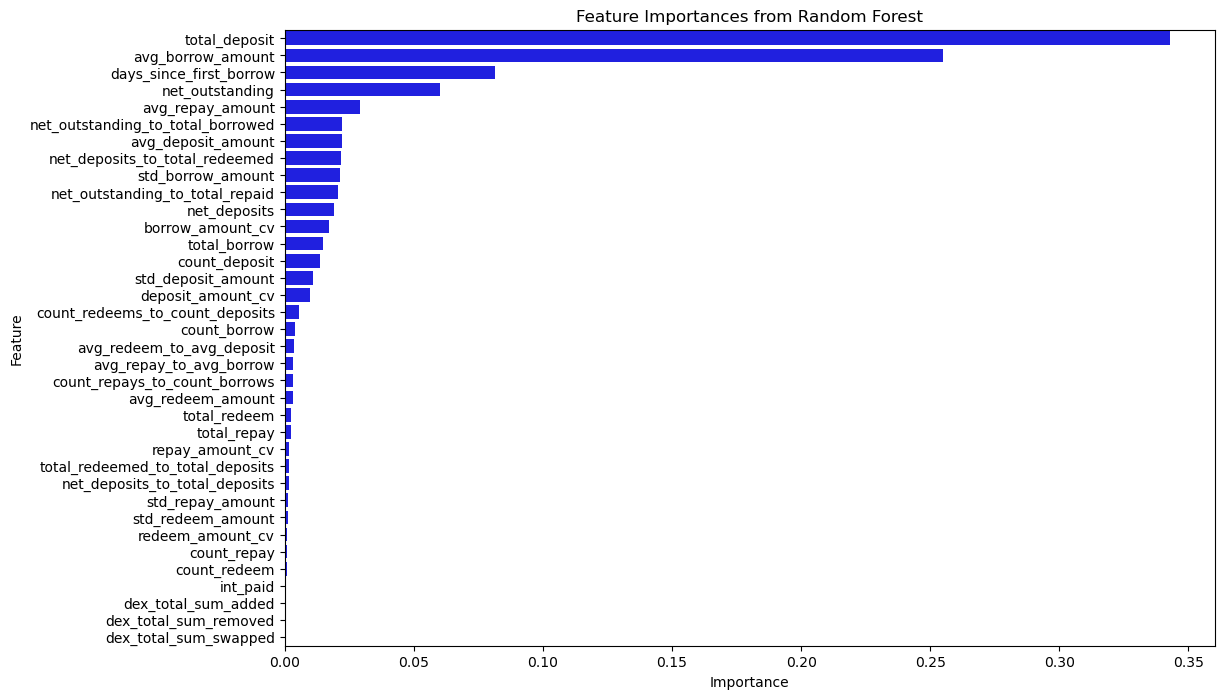

,Feature,Importance
10,total_deposit,0.343063
2,avg_borrow_amount,0.255102
20,days_since_first_borrow,0.081527
21,net_outstanding,0.060123
7,avg_repay_amount,0.029205


In [22]:
# Get feature importances from the RandomForestRegressor
feature_importances_rf = random_forest.feature_importances_

feature_names = X_train_new.columns

# Create a DataFrame to view the feature names alongside their importance scores
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_rf
})
a
# Sort the DataFrame by the importance of features in descending order
importances_df_sorted = importances_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=importances_df_sorted, x='Importance', y='Feature', color='blue')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Calculate the number of features to select (15% of the total features)
num_features = int(len(feature_names) * 0.15)

# Select the top 15% of the features
top_15_percent_features = importances_df_sorted.head(num_features)
display(top_15_percent_features)

Now we have the top 15% percent features, we will then do a PCA for the rest of the variables. But before that, we shall split our dataset first to training, validation, and test set.

In [23]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (Y)
X = lending_df_clean.drop('total_liquidation_to_total_borrow', axis=1)  # all columns except the target
Y = lending_df_clean['total_liquidation_to_total_borrow']  # only the target column

# Split the dataset into training and testing sets
# Default is 75% training and 25% testing.
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("X_train_val Shape: ", X_train_val.shape)
print("X_test Shape: ", X_test.shape)

X_train_val Shape:  (380168, 61)
X_test Shape:  (126723, 61)


In [24]:
# Split Train val into 75% training and 25% validation.
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.25, random_state=42)
print("X_train Shape: ", X_train.shape)
print("X_val Shape: ", X_val.shape)

X_train Shape:  (285126, 61)
X_val Shape:  (95042, 61)


In [25]:
#For future purposes, let's extract the variables/features that we don't plan to inlcude on the PCA transformation
# Extracting time-related features and their sine and cosine transformations
time_features = [
    'first_borrow_date_year', 'first_borrow_date_month', 'first_borrow_date_day',
    'first_borrow_date_hour', 'first_borrow_date_hour_sin', 'first_borrow_date_hour_cos',
    'calc_start_time_year', 'calc_start_time_month', 'calc_start_time_day',
    'calc_start_time_hour', 'calc_start_time_hour_sin', 'calc_start_time_hour_cos',
    'added_at_year', 'added_at_month', 'added_at_day',
    'added_at_hour', 'added_at_hour_sin', 'added_at_hour_cos',
    'token_borrow_mode'
]

# Ensure only time features that exist in the DataFrame are selected
time_features = [feature for feature in time_features if feature in X_train.columns]

# Extract the top 15% features
top_features = top_15_percent_features['Feature'].tolist()

non_pca_features = time_features + top_features
print(non_pca_features)

# Columns for standardization and PCA
std_pca_columns = [col for col in X_train.columns if col not in non_pca_features]

['first_borrow_date_year', 'first_borrow_date_month', 'first_borrow_date_day', 'first_borrow_date_hour', 'first_borrow_date_hour_sin', 'first_borrow_date_hour_cos', 'calc_start_time_year', 'calc_start_time_month', 'calc_start_time_day', 'calc_start_time_hour', 'calc_start_time_hour_sin', 'calc_start_time_hour_cos', 'added_at_year', 'added_at_month', 'added_at_day', 'added_at_hour', 'added_at_hour_sin', 'added_at_hour_cos', 'token_borrow_mode', 'total_deposit', 'avg_borrow_amount', 'days_since_first_borrow', 'net_outstanding', 'avg_repay_amount']


We will further split our train dataset into 2 (stack_train and stack_validation), since we plan to train multiple models and do stacked prediction with these models. We will first train our model using the stack_train dataset then create predictions with the stack_validation dataset and append the result to stack_validation dataset where we will create our final stacked prediction. But before all these we will also do standardization, one hot  encoding and PCA transformation on other parts of our dataset.

In [26]:
# Split Train val into 50% training and 50% validation.
X_stack_train, X_stack_val, Y_stack_train, Y_stack_val = train_test_split(X_train, Y_train, test_size=0.5, random_state=42)
print("X_stack_train Shape: ", X_stack_train.shape)
print("X_stack_val Shape: ", X_stack_val.shape)

X_stack_train Shape:  (142563, 61)
X_stack_val Shape:  (142563, 61)


In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Column for one-hot encoding
categorical_columns = ['token_borrow_mode']

# Setup the pipeline for standardization and PCA
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))  # Retains 95% of variability
])

# Setup the full transformation pipeline
# This includes both PCA on specific features and one-hot encoding on categorical features
transformation_pipeline = ColumnTransformer([
    ('pca_pipe', pca_pipeline, std_pca_columns),  # Apply standardization and PCA
    ('cat', OneHotEncoder(), categorical_columns)  # Apply one-hot encoding
], remainder="passthrough")


# Fit and transform the data
X_stack_train_transformed = transformation_pipeline.fit_transform(X_stack_train)

# Let's construct the full list of new column names:
pca_features = [f'PCA_{i+1}' for i in range(transformation_pipeline.named_transformers_['pca_pipe']['pca'].n_components_)]
one_hot_features = transformation_pipeline.named_transformers_['cat'].get_feature_names_out(categorical_columns)
remaining_features = [X_stack_train.columns[idx] for idx in transformation_pipeline.transformers_[-1][-1]]
all_column_names = pca_features + list(one_hot_features) + list(remaining_features)

# Recreate the DataFrame
X_stack_train_transformed_df = pd.DataFrame(X_stack_train_transformed, columns=all_column_names, index=X_stack_train.index)

# Check the new shape and content
print("Transformed DataFrame shape:", X_stack_train_transformed_df.shape)
display(X_stack_train_transformed_df[remaining_features].head())

Transformed DataFrame shape: (142563, 53)


,avg_borrow_amount,avg_repay_amount,total_deposit,days_since_first_borrow,net_outstanding,first_borrow_date_year,first_borrow_date_month,first_borrow_date_day,first_borrow_date_hour,calc_start_time_year,...,added_at_year,added_at_month,added_at_day,added_at_hour,first_borrow_date_hour_sin,first_borrow_date_hour_cos,calc_start_time_hour_sin,calc_start_time_hour_cos,added_at_hour_sin,added_at_hour_cos
744883,0.081762,0.050498,13.855170,251.0,2.270088,2022.0,6.0,8.0,0.0,2023.0,...,2023.0,2.0,14.0,16.0,0.0,1.0,-0.866025,-0.500000,-0.866025,-5.000000e-01
689125,0.007117,0.001000,3.010811,237.0,0.184039,2022.0,6.0,3.0,0.0,2023.0,...,2023.0,1.0,26.0,16.0,0.0,1.0,-0.866025,-0.500000,-0.866025,-5.000000e-01
727742,0.039761,0.106815,19.757438,157.0,0.482541,2022.0,9.0,6.0,0.0,2023.0,...,2023.0,2.0,10.0,16.0,0.0,1.0,-0.866025,-0.500000,-0.866025,-5.000000e-01
187963,1.005968,4.999818,40.862139,108.0,0.030022,2022.0,11.0,3.0,0.0,2023.0,...,2023.0,2.0,19.0,16.0,0.0,1.0,-0.866025,-0.500000,-0.866025,-5.000000e-01
407763,0.348649,0.436293,25.340104,227.0,0.520081,2022.0,6.0,6.0,0.0,2023.0,...,2023.0,1.0,19.0,6.0,0.0,1.0,-0.707107,0.707107,1.000000,6.123234e-17


## Training the Baseline Models

In [28]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Initialize the models with some default parameters. These parameters can be tuned further for better performance.
rf_stack = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=6)
gb_stack = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
knn_stack = KNeighborsRegressor(n_neighbors=5)
svm_stack = SVR(kernel='rbf', C=1.0, gamma='scale')

In [29]:
# Fit the models on the stack_training data
rf_stack.fit(X_stack_train_transformed_df, Y_stack_train)
gb_stack.fit(X_stack_train_transformed_df, Y_stack_train)
knn_stack.fit(X_stack_train_transformed_df, Y_stack_train)
svm_stack.fit(X_stack_train_transformed_df, Y_stack_train)

SVR()

In [30]:
# Models list
models = [
    ("Random Forest", rf_stack),
    ("Gradient Boosting", gb_stack),
    ("KNN", knn_stack),
    ("SVM", svm_stack),
]

# Prepare dictionaries to hold the scores
mse_scores_train = {}
mse_scores_test = {}
rmse_scores_train = {}
rmse_scores_test = {}

#Transform X_stack_val
X_stack_val_transformed = transformation_pipeline.transform(X_stack_val)
# Recreate the DataFrame
X_stack_val_transformed_df = pd.DataFrame(X_stack_val_transformed, columns=all_column_names, index=X_stack_val.index)

# Calculate scores
for name, model in models:
    # Predictions
    train_preds = model.predict(X_stack_train_transformed_df)
    val_preds = model.predict(X_stack_val_transformed_df)
    
    # MSE
    mse_scores_train[name] = mean_squared_error(Y_stack_train, train_preds)
    mse_scores_test[name] = mean_squared_error(Y_stack_val, val_preds)
    
    # RMSE
    rmse_scores_train[name] = rmse(Y_stack_train, train_preds)
    rmse_scores_test[name] = rmse(Y_stack_val, val_preds)

# Convert dictionaries to DataFrames for easier plotting
mse_df = pd.DataFrame([mse_scores_train, mse_scores_test], index=["MSE Train", "MSE Test"])
rmse_df = pd.DataFrame([rmse_scores_train, rmse_scores_test], index=["RMSE Train", "RMSE Test"])

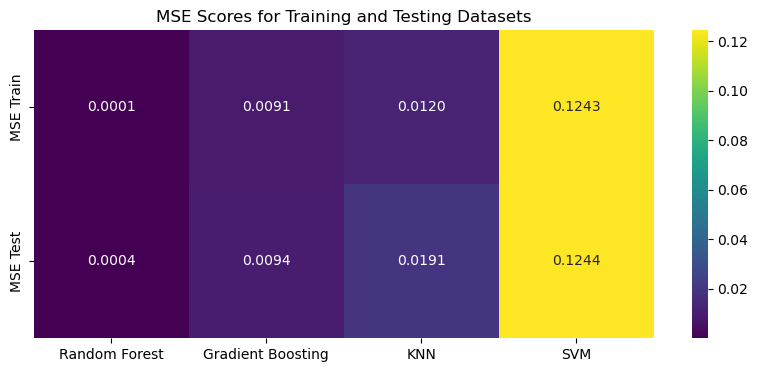

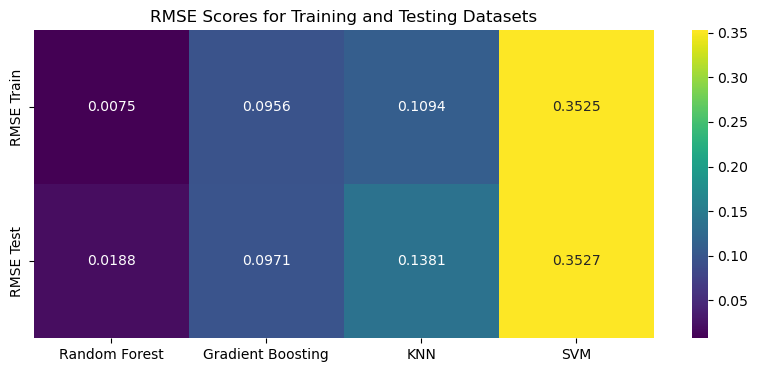

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot heatmap
def plot_heatmap(data, title):
    plt.figure(figsize=(10, 4))
    sns.heatmap(data, annot=True, fmt=".4f", cmap="viridis", cbar=True)
    plt.title(title)
    plt.show()

# Plotting the MSE and RMSE heatmaps
plot_heatmap(mse_df, "MSE Scores for Training and Testing Datasets")
plot_heatmap(rmse_df, "RMSE Scores for Training and Testing Datasets")

The MSE and RMSE of our Random Forest Model and Gradient Boosting Regressor Model has improved. We could further improve this models using Grid Search CV. But this would be computationally expensive considering that it might only give a limited improvement. Thus for our next steps we will use our model to create predictions and create a modified version of stacking regressor, where we append the predictions of these models and use them to train our final model using the stacking validation set. We can improve the hyperparameter of our final model using the validation set and assess the overall score using the test set and then create our predictions on the unlabeled datasets. But before that, let's take a look on how the models above scores using R2 metric.

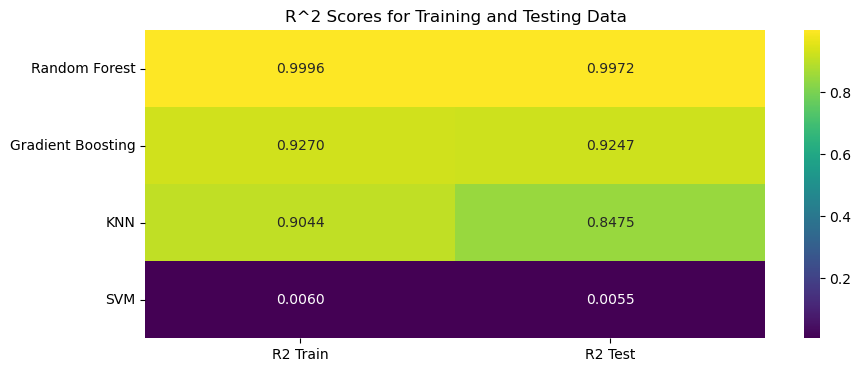

In [32]:
#Let's also calculate the R2_score of each model

from sklearn.metrics import r2_score

r2_scores_train = {}
r2_scores_test = {}

# Calculate R^2 for each model using the .score() method
for name, model in models:
    r2_scores_train[name] = model.score(X_stack_train_transformed_df, Y_stack_train)
    r2_scores_test[name] = model.score(X_stack_val_transformed_df, Y_stack_val)

# Convert the R^2 scores into a pandas DataFrame for visualization purposes
r2_df = pd.DataFrame({
    'R2 Train': r2_scores_train,
    'R2 Test': r2_scores_test
})

# Plot the R^2 Scores Heatmap
plot_heatmap(r2_df, "R^2 Scores for Training and Testing Data")

Considering that SVM (Support Vector Machines) are computationally expensive, we will drop/won't use this model on creating our final model. To further improve the processing and predicting speed of our models.

## Final Model Training

In this section, we will be training our final model but using the outputs of our base model. This is an attempt of creating a stacked regressor but a with a unique implementation where we append their predictions to the training data, hoping that our final model may learn on which predictions from the base model that our final model should likely to choose (improve more) based on the certain conditions from the original predictor variables. This approach is commonly called as feature augmentation or blending.

In [33]:
X_stack_val_transformed_augmented_df = X_stack_val_transformed_df.copy()

# Final base models
final_base_models = [
    ("Random Forest", rf_stack),
    ("Gradient Boosting", gb_stack),
    ("KNN", knn_stack),
]

# Generate predictions and append them to the DataFrame
for name, model in final_base_models:
    val_preds = model.predict(X_stack_val_transformed_df)
    X_stack_val_transformed_augmented_df[name + ' predictions'] = val_preds  # Add predictions as new features

In [34]:
from xgboost import XGBRegressor

# Initialize XGBoost regressor
xgb_final = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)

# Train the XGBoost model
xgb_final.fit(X_stack_val_transformed_augmented_df, Y_stack_val)

# Predict the validation set
val_predictions = xgb_final.predict(X_stack_val_transformed_augmented_df)

# Calculate MSE and RMSE
final_mse = mean_squared_error(Y_stack_val, val_predictions)
final_rmse = np.sqrt(final_mse)
# Calculate R2 score
final_r2 = r2_score(Y_stack_val, val_predictions)

# Print the results
print("Final MSE:", final_mse)
print("Final RMSE:", final_rmse)
print("Final R2 Score:", final_r2)

Final MSE: 0.00021378035230899386
Final RMSE: 0.014621229507431784
Final R2 Score: 0.9982910470581311


In [35]:
# Initialize Random Forest regressor
rf_final = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)

# Train the Random Forest model
rf_final.fit(X_stack_val_transformed_augmented_df, Y_stack_val)

# Predict the validation set
val_predictions = rf_final.predict(X_stack_val_transformed_augmented_df)

# Calculate MSE and RMSE
final_mse = mean_squared_error(Y_stack_val, val_predictions)
final_rmse = np.sqrt(final_mse)
# Calculate R2 score
final_r2 = r2_score(Y_stack_val, val_predictions)

# Print the results
print("Final MSE:", final_mse)
print("Final RMSE:", final_rmse)
print("Final R2 Score:", final_r2)

Final MSE: 3.830618703921914e-05
Final RMSE: 0.006189199224392372
Final R2 Score: 0.9996937816299515


Considering the results above, we can see that the random forest regressor has worked better compared to XGBoost Regressor, thus we will choose this one as our final model.

## Validation and Hyperparameter Tuning

In this section, let's try to squeeze a bit more of the performance of our model by tuning the hyper parameters of our final model.

In [36]:
#First let's do the column transformation of our validation set (for final model)
#Transform X_val
X_val_transformed = transformation_pipeline.transform(X_val)
# Recreate the DataFrame
X_val_transformed_df = pd.DataFrame(X_val_transformed, columns=all_column_names, index=X_val.index)

X_val_transformed_augmented_df = X_val_transformed_df.copy()

# Generate predictions and append them to the DataFrame
for name, model in final_base_models:
    val_preds = model.predict(X_val_transformed_df)
    X_val_transformed_augmented_df[name + ' predictions'] = val_preds  # Add predictions as new features

In [37]:
#HyperParameter Tuning using Randomized Search CV
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

# Parameter distributions for RandomForestRegressor
param_distributions = {
    'max_features': ['auto', 'sqrt', 'log2'], # The number of features to consider when looking for the best split
    'bootstrap': [True, False]       # Method for sampling data points (with or without replacement)
}

# Setup RandomizedSearchCV
search = RandomizedSearchCV(
    estimator=rf_final, 
    param_distributions=param_distributions, 
    n_iter=100,           # Number of parameter settings sampled
    scoring='neg_mean_squared_error', # Can use other metrics like 'r2'
    cv=5,                 # 5-fold cross-validation
    random_state=42,
    n_jobs=-1             # Use all cores
)

search.fit(X_val_transformed_augmented_df, Y_val)  # Make sure to define X_train and y_train

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                                   random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2']},
                   random_state=42, scoring='neg_mean_squared_error')

In [38]:
# Get best_estimator
best_model = search.best_estimator_

# Make predictions on the validation set
val_predictions = best_model.predict(X_val_transformed_augmented_df) 

# Calculate MSE
val_mse = mean_squared_error(Y_val, val_predictions)
# Calculate RMSE
val_rmse = np.sqrt(val_mse)
# Calculate R² Score
val_r2 = r2_score(Y_val, val_predictions)

# Print the results
print("Validation MSE:", val_mse)
print("Validation RMSE:", val_rmse)
print("Validation R2 Score:", val_r2)

Validation MSE: 4.218845179207623e-05
Validation RMSE: 0.006495263796958229
Validation R2 Score: 0.9996637778712166


## Test Set Final Score

In this section we will test the final results of our model.

In [39]:
#First let's do the column transformation of our test set (for final model)
#Transform X_val
X_test_transformed = transformation_pipeline.transform(X_test)
# Recreate the DataFrame
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=all_column_names, index=X_test.index)

X_test_transformed_augmented_df = X_test_transformed_df.copy()

# Generate predictions and append them to the DataFrame
for name, model in final_base_models:
    val_preds = model.predict(X_test_transformed_df)
    X_test_transformed_augmented_df[name + ' predictions'] = val_preds  # Add predictions as new features

In [40]:
# Make predictions on the test set
test_predictions = best_model.predict(X_test_transformed_augmented_df)

test_mse = mean_squared_error(Y_test, test_predictions)

# Calculate RMSE
test_rmse = np.sqrt(test_mse)
 
# Calculate R² Score
test_r2 = r2_score(Y_test, test_predictions)

# Print the results
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R2 Score:", test_r2)

Test MSE: 0.0002978875218628218
Test RMSE: 0.017259418352390147
Test R2 Score: 0.9976202926171817


## Saving our Model and Transformation Pipelines

As to not loss progress on updating the giza-datasets library to create preidctions on the unlabeled test data, we will save all of our model and transformation pipelines to access it again as soon we restart the kernel. Yet this process can also be skipped.

In [41]:
from joblib import dump

# Assume rf_stack, gb_stack, knn_stack, svm_stack are your models
# and transformation_pipeline is your preprocessing pipeline
dump(rf_stack, 'rf_model.joblib')
dump(gb_stack, 'gb_model.joblib')
dump(knn_stack, 'knn_model.joblib')
dump(best_model, 'best_final_rf_model.joblib')
dump(transformation_pipeline, 'transformation_pipeline.joblib')

['transformation_pipeline.joblib']

In [42]:
from joblib import load

rf_model = load('rf_model.joblib')
gb_model = load('gb_model.joblib')
knn_model = load('knn_model.joblib')
best_model = load('best_final_rf_model.joblib')
transformation_pipeline_model = load('transformation_pipeline.joblib')

import_base_models = [
    ("Random Forest", rf_model),
    ("Gradient Boosting", gb_model),
    ("KNN", knn_model),
]

In [43]:
#For sanity check let's try to transform then score again our test dataset if the results are the same

#First let's do the column transformation of our test set (for final model)
#Transform X_val
X_test_transformed_copy = transformation_pipeline_model.transform(X_test)
# Recreate the DataFrame
X_test_transformed_df_copy = pd.DataFrame(X_test_transformed_copy, columns=all_column_names, index=X_test.index)

X_test_transformed_augmented_df_copy = X_test_transformed_df_copy.copy()

# Generate predictions and append them to the DataFrame
for name, model in import_base_models:
    val_preds = model.predict(X_test_transformed_df_copy)
    X_test_transformed_augmented_df_copy[name + ' predictions'] = val_preds  # Add predictions as new features

In [44]:
# Make predictions on the test set
test_predictions = best_model.predict(X_test_transformed_augmented_df_copy)

test_mse = mean_squared_error(Y_test, test_predictions)

# Calculate RMSE
test_rmse = np.sqrt(test_mse)
 
# Calculate R² Score
test_r2 = r2_score(Y_test, test_predictions)

# Print the results
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R2 Score:", test_r2)

Test MSE: 0.0002978875218628218
Test RMSE: 0.017259418352390147
Test R2 Score: 0.9976202926171817


We have successfully exported and imported our models and transformation pipelines now we can proceed on predicitng our unlabeled test data.

## Predicting Unlabeled Test Data

In this section, we will be predicting the unlabeled test data by Giza and Gora and turn the prediction values into .csv and .npy file to be assessed by the organizers of the competition.

In [45]:
from giza_datasets import DatasetsLoader

loader = DatasetsLoader()
df_ul_test = loader.load("gora-competition-evaluation")

Dataset read from cache.
Loading dataset gora-competition-evaluation from cache.


In [46]:
df_ul_test = df_ul_test.to_pandas()

In [47]:
df_ul_test.head()

,total_borrow,count_borrow,avg_borrow_amount,std_borrow_amount,first_borrow_date,token_borrow_mode,borrow_amount_cv,total_repay,count_repay,avg_repay_amount,...,count_redeems_to_count_deposits,total_redeemed_to_total_deposits,avg_redeem_to_avg_deposit,net_deposits_to_total_deposits,net_deposits_to_total_redeemed,dex_total_sum_added,dex_total_sum_removed,dex_total_sum_swapped,calc_start_time,added_at
0,19.039084,18,1.057727,2.268998,2022-05-07,USDC,2.145165,0.100039,1.0,0.100039,...,0.032258,0.701785,21.755339,0.298215,0.424938,0.0,0.0,0.0,2023-02-04 16:06:12.097,2023-02-04 16:09:32.485
1,0.140274,1,0.140274,0.000000,2022-08-02,usdc,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.182521,0.0,0.0,0.0,2023-03-01 16:06:24.346,2023-03-01 16:11:22.942
2,9.020736,1,9.020736,0.000000,2022-11-21,usdc,0.000000,0.000000,0.0,0.000000,...,1.000000,0.354577,0.354577,0.645423,1.820265,0.0,0.0,0.0,2023-02-03 16:06:11.043,2023-02-03 16:18:48.896
3,20.050150,1,20.050150,0.000000,2022-08-27,USDC,0.000000,20.007832,1.0,20.007832,...,0.000000,0.000000,0.000000,1.000000,78.856029,0.0,0.0,0.0,2023-02-05 16:06:16.899,2023-02-05 16:16:27.687
4,0.000100,1,0.000100,0.000000,2022-09-06,USDC,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,1.000000,13.051750,0.0,0.0,0.0,2023-01-18 21:18:42.947,2023-01-19 07:01:39.016


### Manual Preprocessing

In [48]:
import pandas as pd

# List of columns to convert to datetime
datetime_columns = ['first_borrow_date', 'calc_start_time', 'added_at']

# Convert columns to datetime
for column in datetime_columns:
    df_ul_test[column] = pd.to_datetime(df_ul_test[column])

# Valid tokens
valid_tokens = ['USDC', 'DAI', 'usdc', 'GHST', 'WMATIC', 'WETH', 'USDT', 'WAVAX']

# Replace 'token_borrow_mode' values that are not in the valid_tokens list with "Others"
df_ul_test['token_borrow_mode'] = df_ul_test['token_borrow_mode'].where(df_ul_test['token_borrow_mode'].isin(valid_tokens), 'Others')

# Function to add datetime components to the DataFrame
def add_datetime_components(df, datetime_cols):
    for column in datetime_cols:
        # Extracting components
        df[column + '_year'] = df[column].dt.year
        df[column + '_month'] = df[column].dt.month
        df[column + '_day'] = df[column].dt.day
        df[column + '_hour'] = df[column].dt.hour
        df[column + '_dayofweek'] = df[column].dt.dayofweek
        
        # Week of month calculation
        # Method: (Day - 1) // 7 + 1 gives the week of the month
        df[column + '_weekofmonth'] = (df[column].dt.day - 1) // 7 + 1

# Apply the function
add_datetime_components(df_ul_test, datetime_columns)

In [49]:
import numpy as np
#Let's do cyclical encoding for our hour variables

# Step 1: Drop the original datetime columns
df_ul_test.drop(['first_borrow_date', 'calc_start_time', 'added_at'], axis=1, inplace=True)

# List of all hour columns in the DataFrame
hour_columns = ['first_borrow_date_hour', 'calc_start_time_hour', 'added_at_hour']

# Step 2: Create cyclical features for each hour column
for col in hour_columns:
    df_ul_test[col + '_sin'] = np.sin(2 * np.pi * df_ul_test[col] / 24)
    df_ul_test[col + '_cos'] = np.cos(2 * np.pi * df_ul_test[col] / 24)

In [50]:
#First let's transform and create a preliminary prediction on our unlabeled test data

#First let's do the column transformation of our test set (for final model)
#Transform X_val
df_ul_test_transformed = transformation_pipeline_model.transform(df_ul_test)

# Recreate the DataFrame
df_ul_test_transformed_df = pd.DataFrame(df_ul_test_transformed, columns=all_column_names, index=df_ul_test.index)

df_ul_test_transformed_augmented_df = df_ul_test_transformed_df.copy()

# Generate predictions and append them to the DataFrame
for name, model in import_base_models:
    val_preds = model.predict(df_ul_test_transformed_df)
    df_ul_test_transformed_augmented_df[name + ' predictions'] = val_preds  # Add predictions as new features

In [51]:
# Make predictions on the test set
test_predictions = best_model.predict(df_ul_test_transformed_augmented_df)

print(test_predictions)

[1.52524189e-01 9.70288187e-01 9.73251703e-01 ... 8.65640371e-11
 0.00000000e+00 9.31299615e-01]


In [52]:
# Save as CSV, no header
np.savetxt("test_predictions.csv", test_predictions, delimiter=",")
np.save("test_predictions.npy", test_predictions)

## Conclusion and Recommendations
### Overview
This project was based on predicting the full liquidation of the __total borrow ratio__ for each outstanding loan in the `Gora Lending Data`, where advanced machine learning methodologies were applied to improve the accuracy of predictions and build stronger credit risk management in the decentralized finance landscape.

### Base Model Performance
The base models are a `Random Forest Regressor`, `Gradient Boosting Regressor`, and `K-Nearest Neighbors` and are the base predictive methods that were used. Being models of this nature, they afford an initial indication of predictability and help to sketch out some of the primary features that will impact loan liquidations. Still, the use of them inherently comes with a set of both advantages and disadvantages:

Pros:
1. _Robustness_: Tree-based models, such as Random Forest or Gradient Boosting, are less sensitive to outliers and are, in turn, robust to variable data anomalies.
2. _Non-linearity_: The models can thus capture complex, nonlinear relationships within the data without the need for data transformation—nonlinearities are a critical element in the treatment of financial data.

Cons:
1. _Overfitting_: Overfitting may occur, especially if the algorithm is not properly tuned or if the data is too diverse without sufficient regularization.
2. _Extrapolation_: Models that do not extrapolate well are those whose data points are found well outside the range of their training data. This limitation becomes extremely important in finance, where market conditions can change very quickly.
        
### Feature augmentation and final model prediction
The strategy for enhancing the base models was to stack the features arising from the first predictions of these three models. This feature augmentation approach tried to encapsulate the diverse insights about prediction into one dataset, which was later used for training a final Random Forest model. The final improved model had better accuracy and robustness but still carried the inherent limitation of poor extrapolation.

### Future Prospects and Mitigation Strategies
Given the noted challenges, especially with extrapolation:

- Deep Learning Models: These can be good alternatives due to the ability to learn high-level abstractions from data through architectures that are able to capture temporal dynamics, e.g. LSTM, or complex patterns, e.g., CNNs, better serving the purpose of extrapolative predictions in finance.
- Continuous Learning: Implementing a system where the model learns with new data passed through at regular intervals is thus able to adapt to changing conditions and avoid model staleness.
- Ensemble Techniques: More advanced ensemble techniques than simple blending, such as stacking, could provide a mechanism to leverage the strengths of multiple diverse models.


### Enhanced Feature Engineering and Data Cleaning
Most of the improvement in model performance came from the initial feature engineering and data cleaning stages. However, there is still room for improvement:
- Advanced Feature Selection: Techniques such as Recursive Feature Elimination (RFE) could be helpful in identifying the more effective features in a more systematic way.
- Outlier Management: More nuanced ways of handling outliers may be adopted to further fine-tune the models. Trimming based on quantile information and transformations are some techniques that might help in balancing the goal of outlier mitigation and information loss.

## Concluding Remarks

Forecasting the Total Liquidation to Total Borrow Ratio has opened the potential for machine learning in financial risk assessment but has also highlighted the necessity for incessantly up-to-date model development practice in the rapidly growing field of DeFi. It should be ensured that new modeling techniques are investigated, that new data processing capabilities are developed, and that the models be kept effective and relevant through constant validation with new data.